In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# No null value in data base and 3 categorical features "Sex", "Smoker" and "region"

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
data .describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# Mean and 50% are seems approx same but oly charges are righ skewed 

<Figure size 500x500 with 0 Axes>

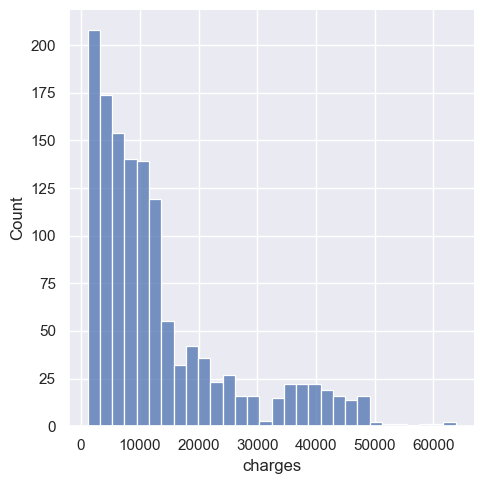

In [16]:
sns.set()
plt.figure(figsize =(5,5))
sns.displot(data ['charges'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_27680\2148823674.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data.age, color ='r').set_title("distribution of age")
C:\Users\DELL\AppData\Local\Temp\ipykernel_27680\2148823674.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data.bmi, color

Text(0.5, 1.0, 'distribution of bmi')

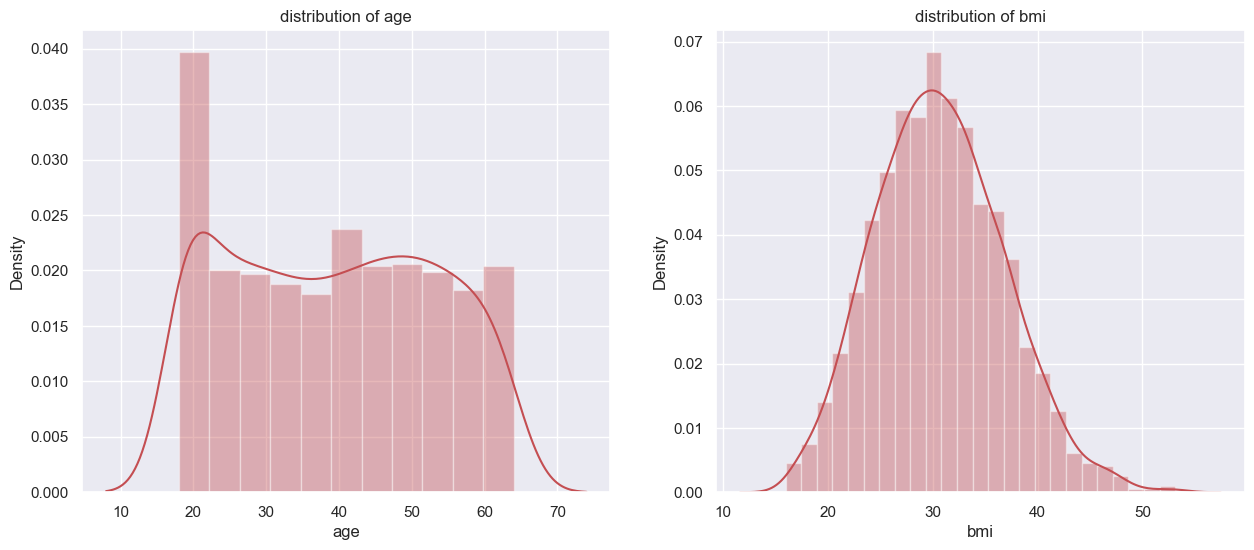

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot (data.age, color ='r').set_title("distribution of age")

plt.subplot(1,2,2)
sns.distplot (data.bmi, color ='r').set_title("distribution of bmi")


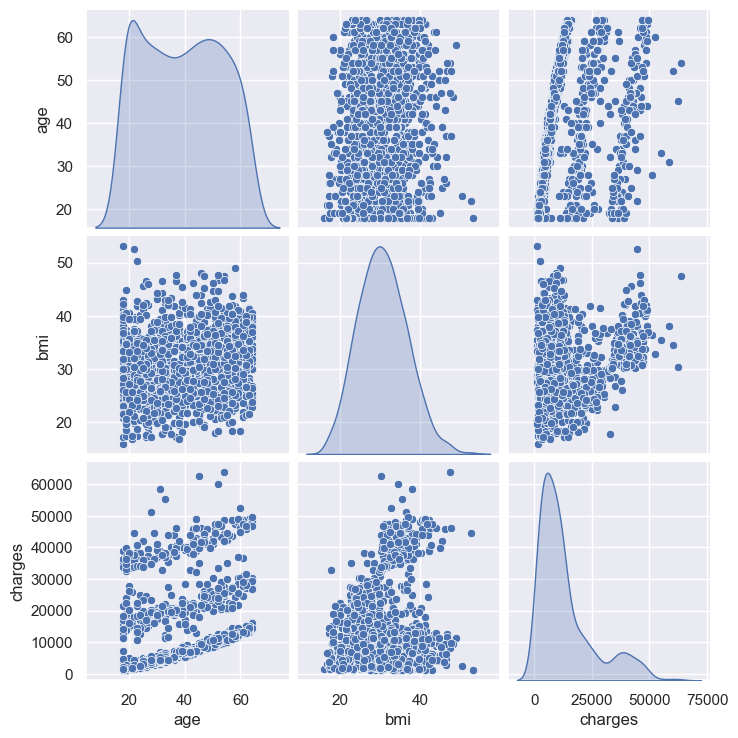

In [20]:
df_num=data[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind='kde')
plt.show()

In [21]:
# in above graph shows linear relationship between age bmi and charges

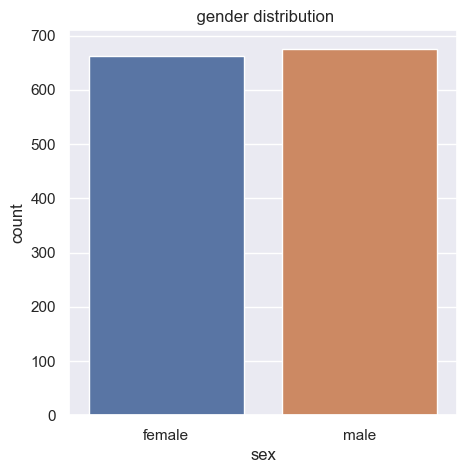

In [22]:
plt.figure(figsize =(5,5))
sns.countplot(x='sex', data=data)
plt.title( ' gender distribution')
plt.show()

In [26]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 500x500 with 0 Axes>

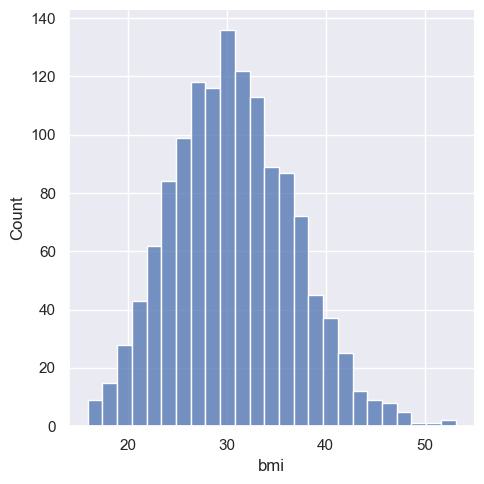

In [27]:
sns.set()
plt.figure(figsize =(5,5))
sns.displot(data ['bmi'])
plt.show()

In [28]:
# bmi seems normally distributed

C:\Users\DELL\AppData\Local\Temp\ipykernel_27680\3410926746.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['children'])


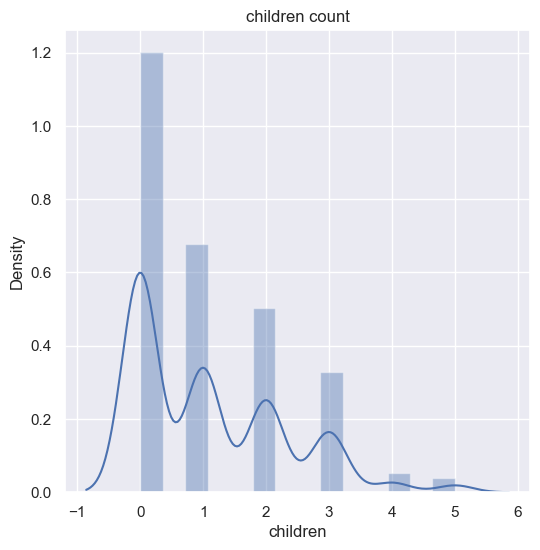

In [37]:
plt.figure(figsize =(6,6))
sns.distplot(data['children'])
plt.title("children count")
plt.show()

In [35]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

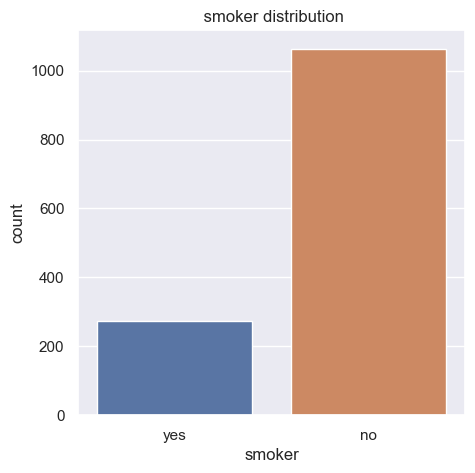

In [38]:
plt.figure(figsize =(5,5))
sns.countplot(x='smoker', data=data)
plt.title( ' smoker distribution')
plt.show()

In [39]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

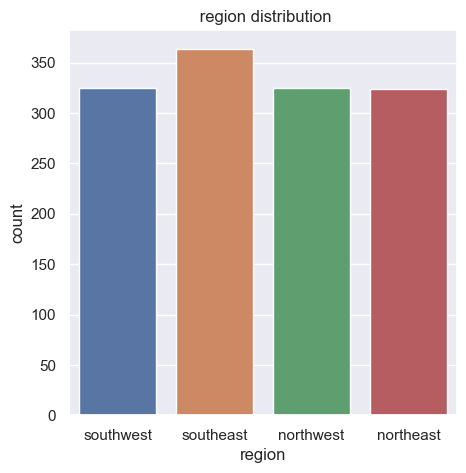

In [40]:
plt.figure(figsize =(5,5))
sns.countplot(x='region', data=data)
plt.title( ' region distribution')
plt.show()

In [41]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

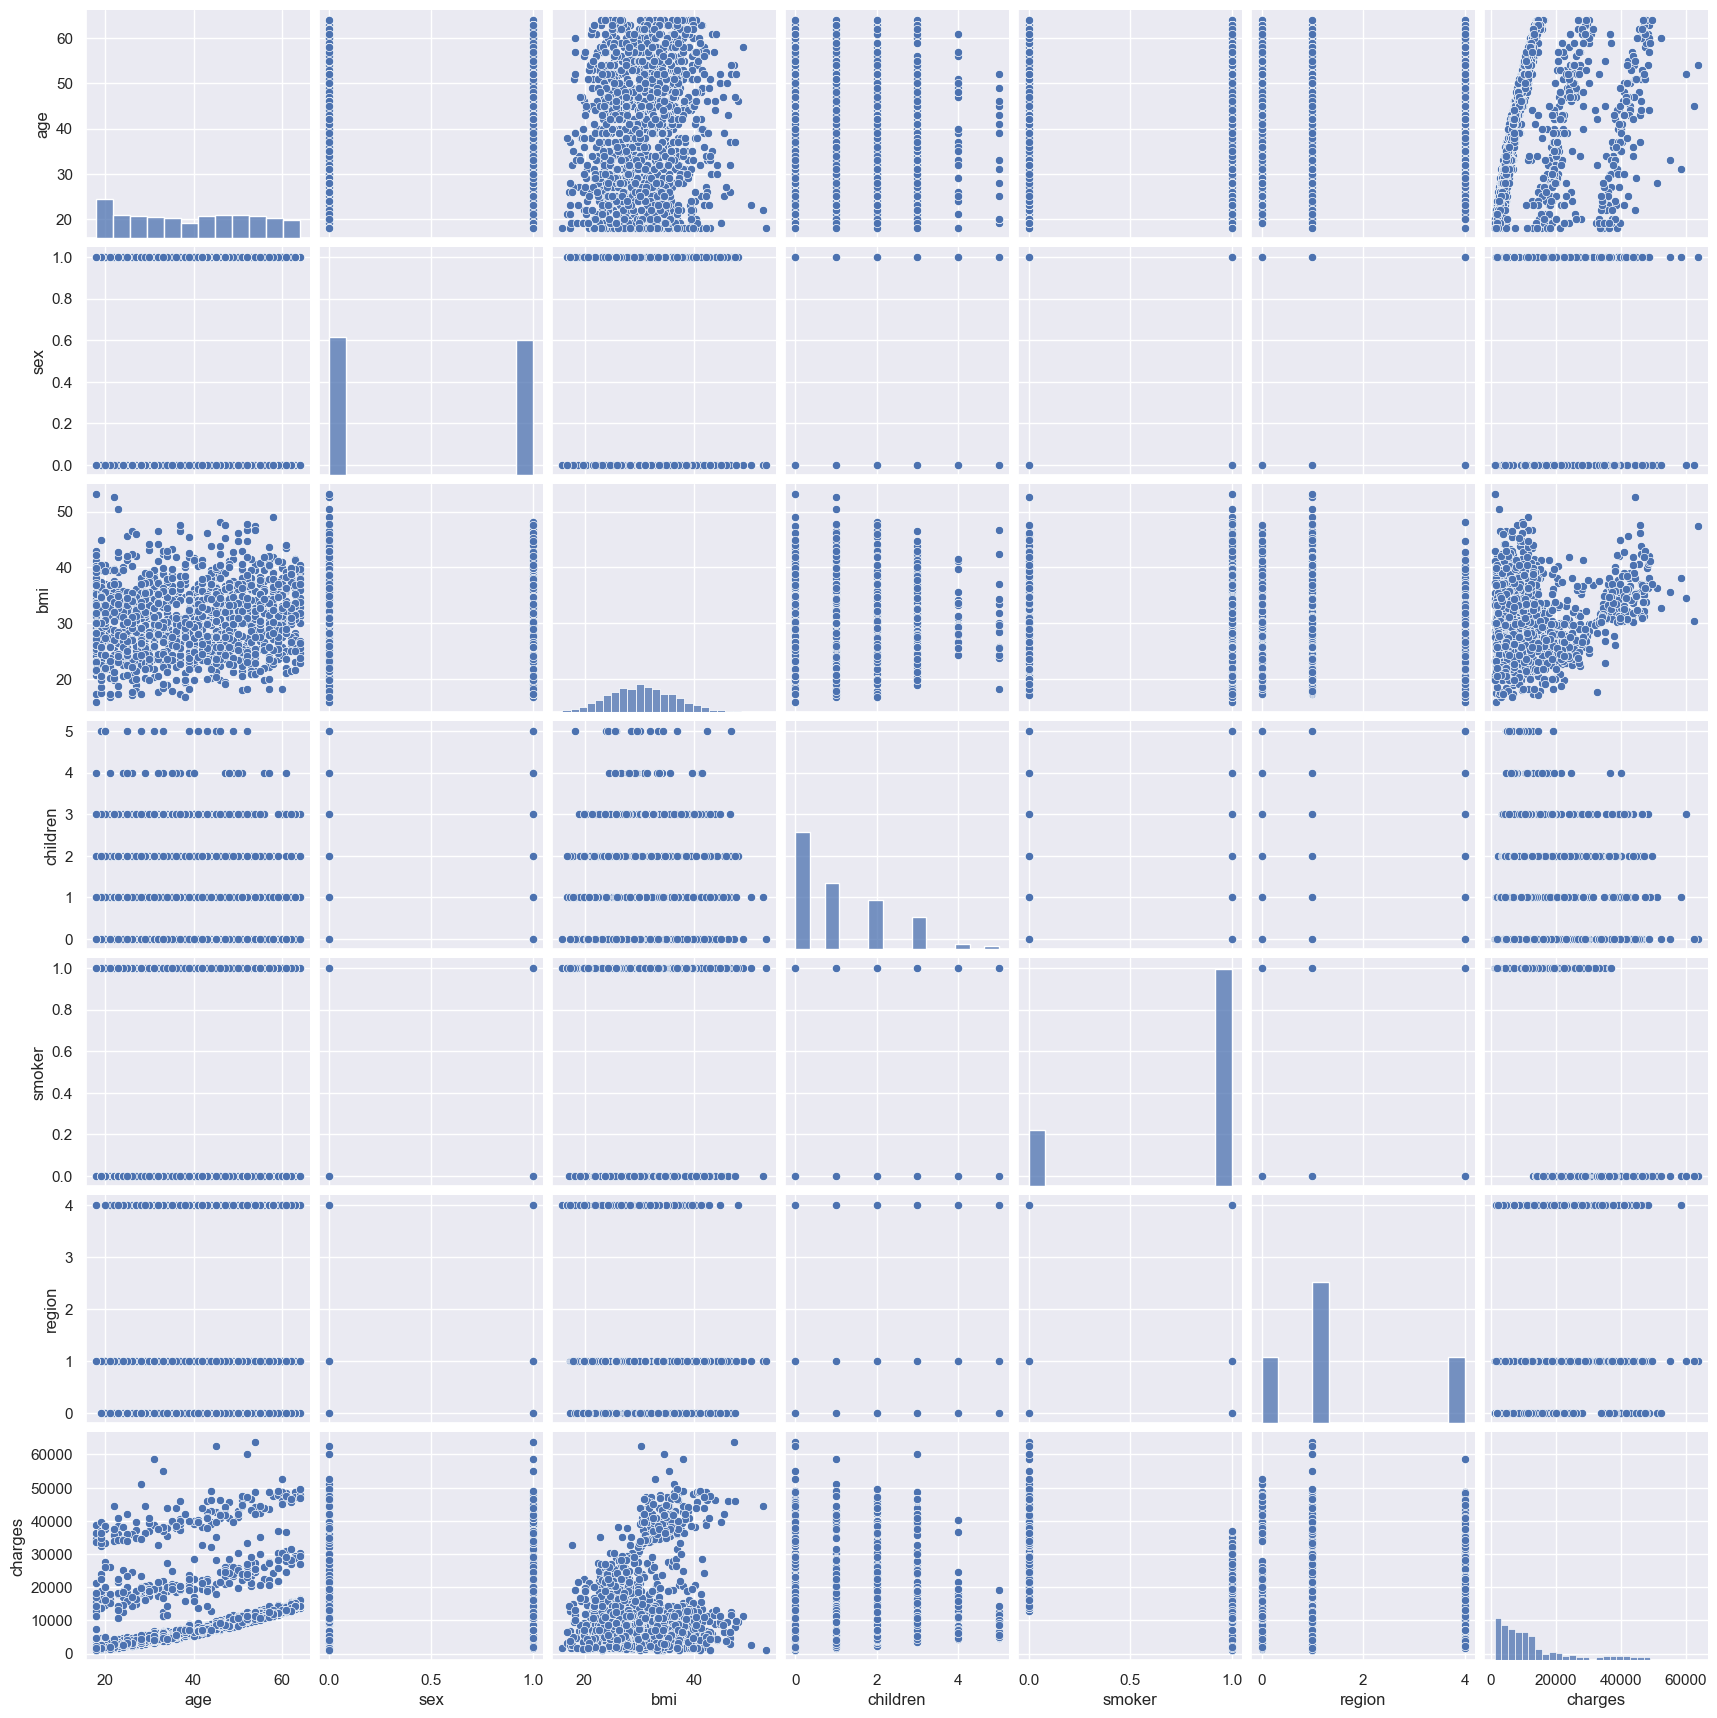

In [121]:
sns.pairplot(data)

<Axes: >

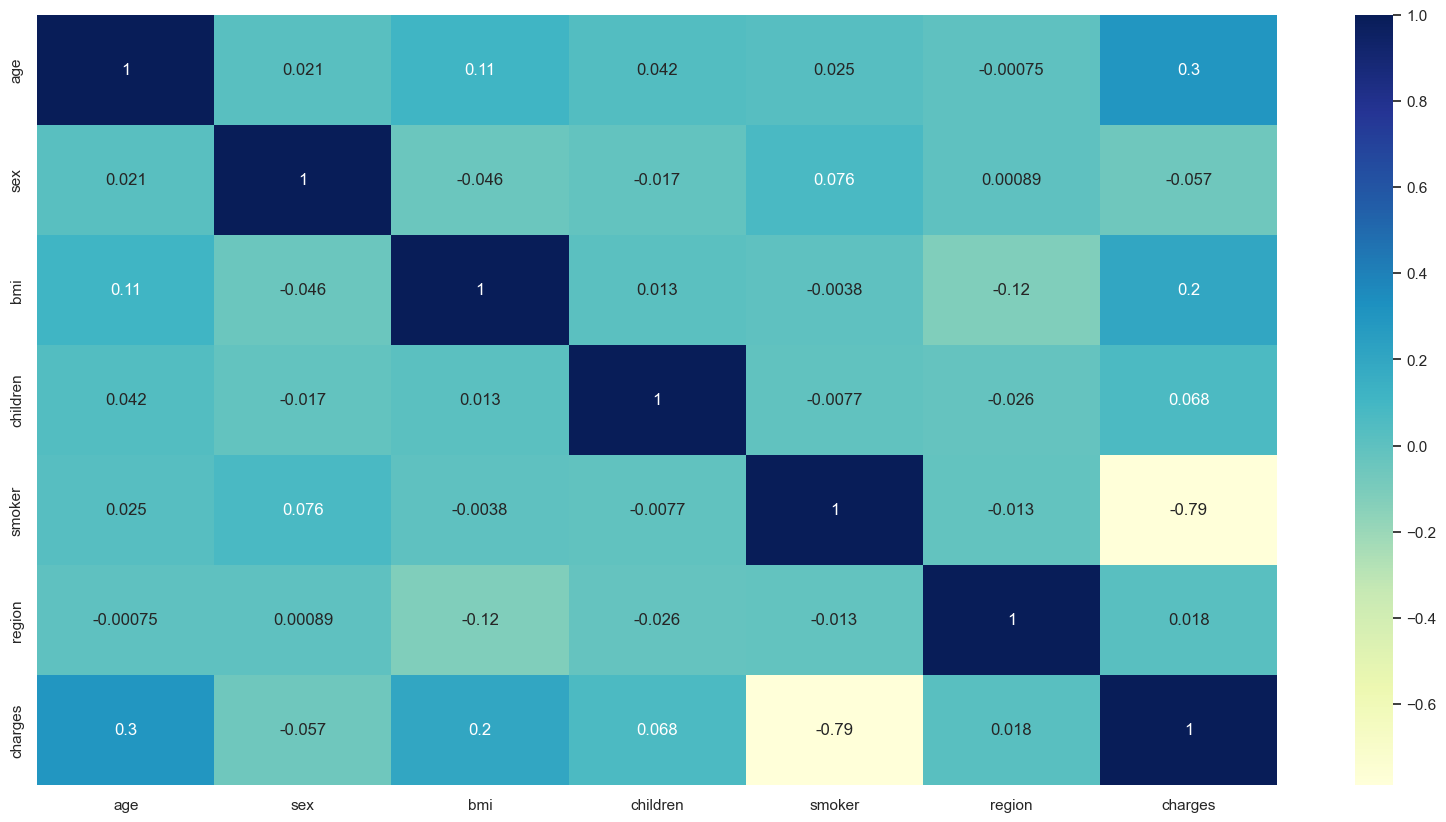

In [126]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True , cmap='YlGnBu')

In [ ]:
# it is in multicollinear in nature and higly with taregt variable
#smoke Age Bmi seems store relationship with charges

In [42]:
# data encoding on categorical column

In [48]:
data.replace({'sex':{'male':0, 'female':1}}, inplace =True)
data.replace({'smoker':{'yes':0, 'no':1}}, inplace =True)
data.replace({'region':{'southwest':0, 'southeast':1,'northwest':1,'northeast':4}}, inplace =True)


In [49]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


In [66]:
features = data.drop(columns='charges', axis=1)
target=data['charges']
print(features)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       1
4      32    0  28.880         0       1       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       1
1334   18    1  31.920         0       1       4
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       1

[1338 rows x 6 columns]


In [67]:
print(target)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [153]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target, test_size=0.2, random_state=2)

In [70]:
X_train.shape

(1070, 6)

In [74]:
Y_train.shape

(1070,)

In [75]:
X_test.shape


(268, 6)

In [76]:
Y_test.shape

(268,)

In [77]:
#linear regression model building

In [78]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [79]:
model_traning=model.predict(X_train) 

In [80]:
#now using R2 square value

In [119]:
r2_train=metrics.r2_score(Y_train,model_traning)
print('R Sq train value is :',r2_train)

R Sq train value is : 0.7518620246822774


In [120]:
model_test=model.predict(X_test)
r2_test=metrics.r2_score(Y_test,model_test)
print('R Sq test value is :',r2_test)


R Sq test value is : 0.744051596094922


In [85]:
from sklearn.metrics import mean_squared_error


In [86]:
model_traning_mse=mean_squared_error(Y_train,model_traning)
model_test_mse=mean_squared_error(Y_test,model_test)
print('MSE train data=',model_traning_mse)
print('MSE test data=',model_test_mse)

MSE train data= 36123097.632007
MSE test data= 38438526.27462231


In [88]:
print('RSME train data',np.sqrt(np.absolute(model_traning_mse)))
print('RSME test data',np.sqrt(np.absolute(model_test_mse)))

RSME train data 6010.249381848228
RSME test data 6199.881150040081


In [112]:
print('Model score', model.score(X_test,Y_test)*100)

Model score 74.4051596094922


In [128]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
forest=RandomForestRegressor()

In [106]:
forest.fit(X_train,Y_train)

RandomForestRegressor()

In [107]:
model2_train=forest.predict(X_train)
model2_test=forest.predict(X_test)

In [118]:
r2_train=metrics.r2_score(Y_train,model2_train)
print('R Sq train value is',r2_train)

r2_test=metrics.r2_score(Y_test,model2_test)
print('R Sq test value is',r2_test)


R Sq train value is 0.9773852206342081
R Sq test value is 0.8309695118145043


In [115]:
model2_train_mse=mean_squared_error(Y_train,model2_train)
model2_test_mse=mean_squared_error(Y_test,model2_test)
print('MSE train data=',model2_train_mse)
print('MSE test data=',model2_test_mse)

MSE train data= 3292184.0436184695
MSE test data= 25385127.47959944


In [116]:
print('RSME train data',np.sqrt(np.absolute(model2_train_mse)))
print('RSME test data',np.sqrt(np.absolute(model2_test_mse)))

RSME train data 1814.4376659501063
RSME test data 5038.365556368398


In [114]:
print('Model score', forest.score(X_test,Y_test)*100)

Model score 83.09695118145044


In [129]:
#score improved vs linear model

In [ ]:
#random forest data Actual vs Prediction - train data and test data

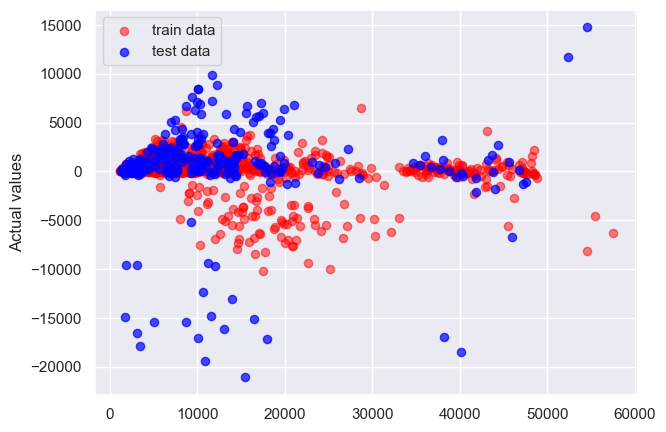

In [133]:
plt.figure(figsize=(7,5))
plt.scatter(model2_train,model2_train-Y_train, c='red', marker='o', s=35,alpha =0.5, label='train data')
plt.scatter(model2_test,model2_test-Y_test, c='blue', marker='o', s=35,alpha =0.7, label='test data')

plt.ylabel("Actual values")
plt.legend(loc="upper left")


In [ ]:
#the features that contribute heavely in towards the prediction, we can check performance of features imp ranking
#feature importance method for Random forest method is able to draw conclusion about features contri. most help user to understand 
#drivers behind the model

In [156]:
imp= forest.feature_importances_
std=np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices=np.argsort(imp)[::-1]
variables=["age","sex","bmi","children","smoker","region"]

imp_list=[]
for value in range(features.shape[1]):
    variable=variables[indices[value]]
    imp_list.append(variables)
    print('%d.%s(%f)' %(value +1, variable, imp[indices[value]]))
    

1.smoker(0.627833)
2.bmi(0.211362)
3.age(0.126974)
4.children(0.018194)
5.region(0.009479)
6.sex(0.006157)


In [ ]:
# as per above Imp method Region and sex  are not imp in to find medical charges, we can remove it and create new model
# to predict caost w/o using those variables, we can only chose 2 low  contri. variables to eliminate because it would be accurate
# to remove many potential independant veriable while creating new model

In [ ]:
#prepare data again by removing unimp,independat veriables and spliting data in train test data

In [161]:
from sklearn.preprocessing import PolynomialFeatures

In [177]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(features)
x_train,x_test,y_train,y_test= train_test_split(x_poly, target, test_size=0.2, random_state=0)

# linear regression

poly_LR= LinearRegression()
poly_LR.fit(x_train,y_train)

y_train_pred=poly_LR.predict(x_train)
y_test_pred=poly_LR.predict(x_test)

print('intercept', poly_LR.intercept_)
print('coefficients', poly_LR.coef_)

#model score is

print('\n model accuracy',(poly_LR.score(x_test,y_test))*100)



intercept 130184276227425.08
coefficients [-1.30184276e+14  2.62607094e+02  5.78884916e+02  2.31049097e+03
 -2.22655515e+02  9.80298388e+03 -3.06271005e+02  1.12831782e+00
 -4.73790919e+01 -2.02222777e+00  9.88859554e+00  2.04421918e+01
 -1.77058555e+01  5.78884916e+02  3.20443666e+01 -4.24218043e+02
 -3.26621699e+02  6.45935296e+02 -1.39204290e+01  5.48613734e+01
 -1.43297986e+03  8.86335004e+00 -1.76478195e+02 -1.02733607e+03
  2.62036498e+02  9.80298388e+03  6.83055291e+02 -2.50720978e+01]

 model accuracy 86.56136586338711


In [ ]:
#linear regression= 74%
#Random forest=83%
#Polynimial linear= 87%

In [180]:
features.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,1
4,32,0,28.880,0,1,1


In [181]:
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [185]:
y_test_pred=poly_LR.predict(x_test)

#Final dala frame
final_df= pd.DataFrame({'Actual Values':y_test,'Predicted values':y_test_pred})
final_df

,Actual Values,Predicted values
578,9724.53000,12800.625000
610,8547.69130,10885.125000
569,45702.02235,50088.796875
1034,12950.07120,13173.046875
198,9644.25250,9717.718750
...,...,...
1084,15019.76005,15617.703125
726,6664.68595,9174.968750
1132,20709.02034,10071.828125
725,40932.42950,45264.890625
